In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from experiments import get_state

SCRIPT_RESULTS_PATHS = "results/script_results"

In [2]:
model_type = "original"

In [3]:
def compute_fidloss_metrics(outputs: np.ndarray, target_state: np.ndarray):
    losses = 1- np.abs(outputs.conj() @ target_state)**2

    return np.mean(losses), np.std(losses)

#### Normal ($\mu = 0.5, \sigma = 0.3$)

/tmp/ipykernel_4545/3960770597.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  approx_states = np.loadtxt(approx_file, delimiter=",", dtype=np.complex64).astype(np.float32)


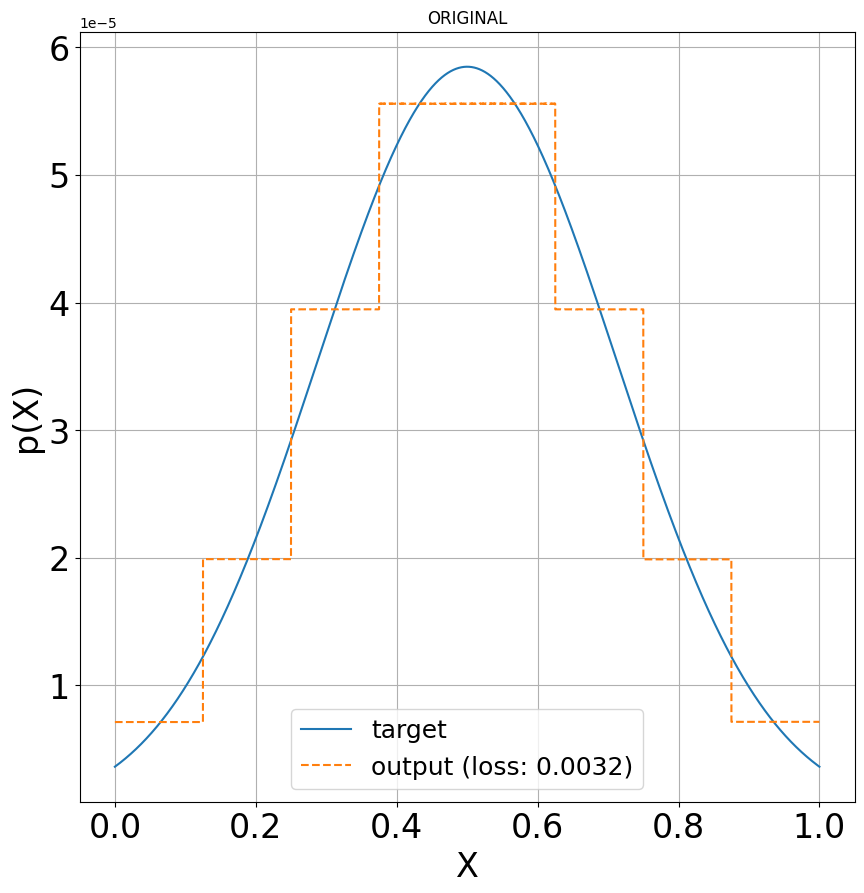

<Figure size 640x480 with 0 Axes>

In [8]:
dist_type = "normal"
dist_params = {"x_points": (0, 1), "loc": 0.5, "scale": 0.3}
num_qubits = 15

target_state = get_state(num_qubits, dist_type, dist_params)

approx_file = os.path.join(SCRIPT_RESULTS_PATHS, dist_type, f"{model_type}_plot_{dist_type}_{num_qubits}qb_0.05eps.csv")
approx_states = np.loadtxt(approx_file, delimiter=",", dtype=np.complex64).astype(np.float32)

mean_losses, std_losses = compute_fidloss_metrics(approx_states, target_state)

mean_approx= np.mean(approx_states, axis=0)

x_points = np.linspace(0, 1, 2**num_qubits)

fontsize = 24

fid = approx_states[0].conj() @ target_state

plt.figure(figsize=(10, 10))
plt.title(model_type.upper())
plt.plot(x_points, np.abs(target_state)**2, label="target")
plt.plot(x_points, np.abs(approx_states[0])**2, "--", label=f"output (loss: {round(1-fid, 4)})")# round(mean_losses, 2)} +/-{round(std_losses, 2)
plt.grid()
plt.xlabel("X", fontsize=fontsize)
plt.ylabel("p(X)", fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(loc="best", fontsize=18)
plot_file_path = os.path.join(SCRIPT_RESULTS_PATHS, dist_type, f"{model_type}_density_plot_{dist_type}_{num_qubits}qb_0.5eps.pdf")
plt.savefig(plot_file_path)
plt.show()
plt.close()
plt.clf()

#### $log$-normal ($\mu = 0.1, \sigma = 0.3$)

/tmp/ipykernel_5304/2724149351.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  approx_states = np.loadtxt(approx_file, delimiter=",", dtype=np.complex64).astype(np.float32)


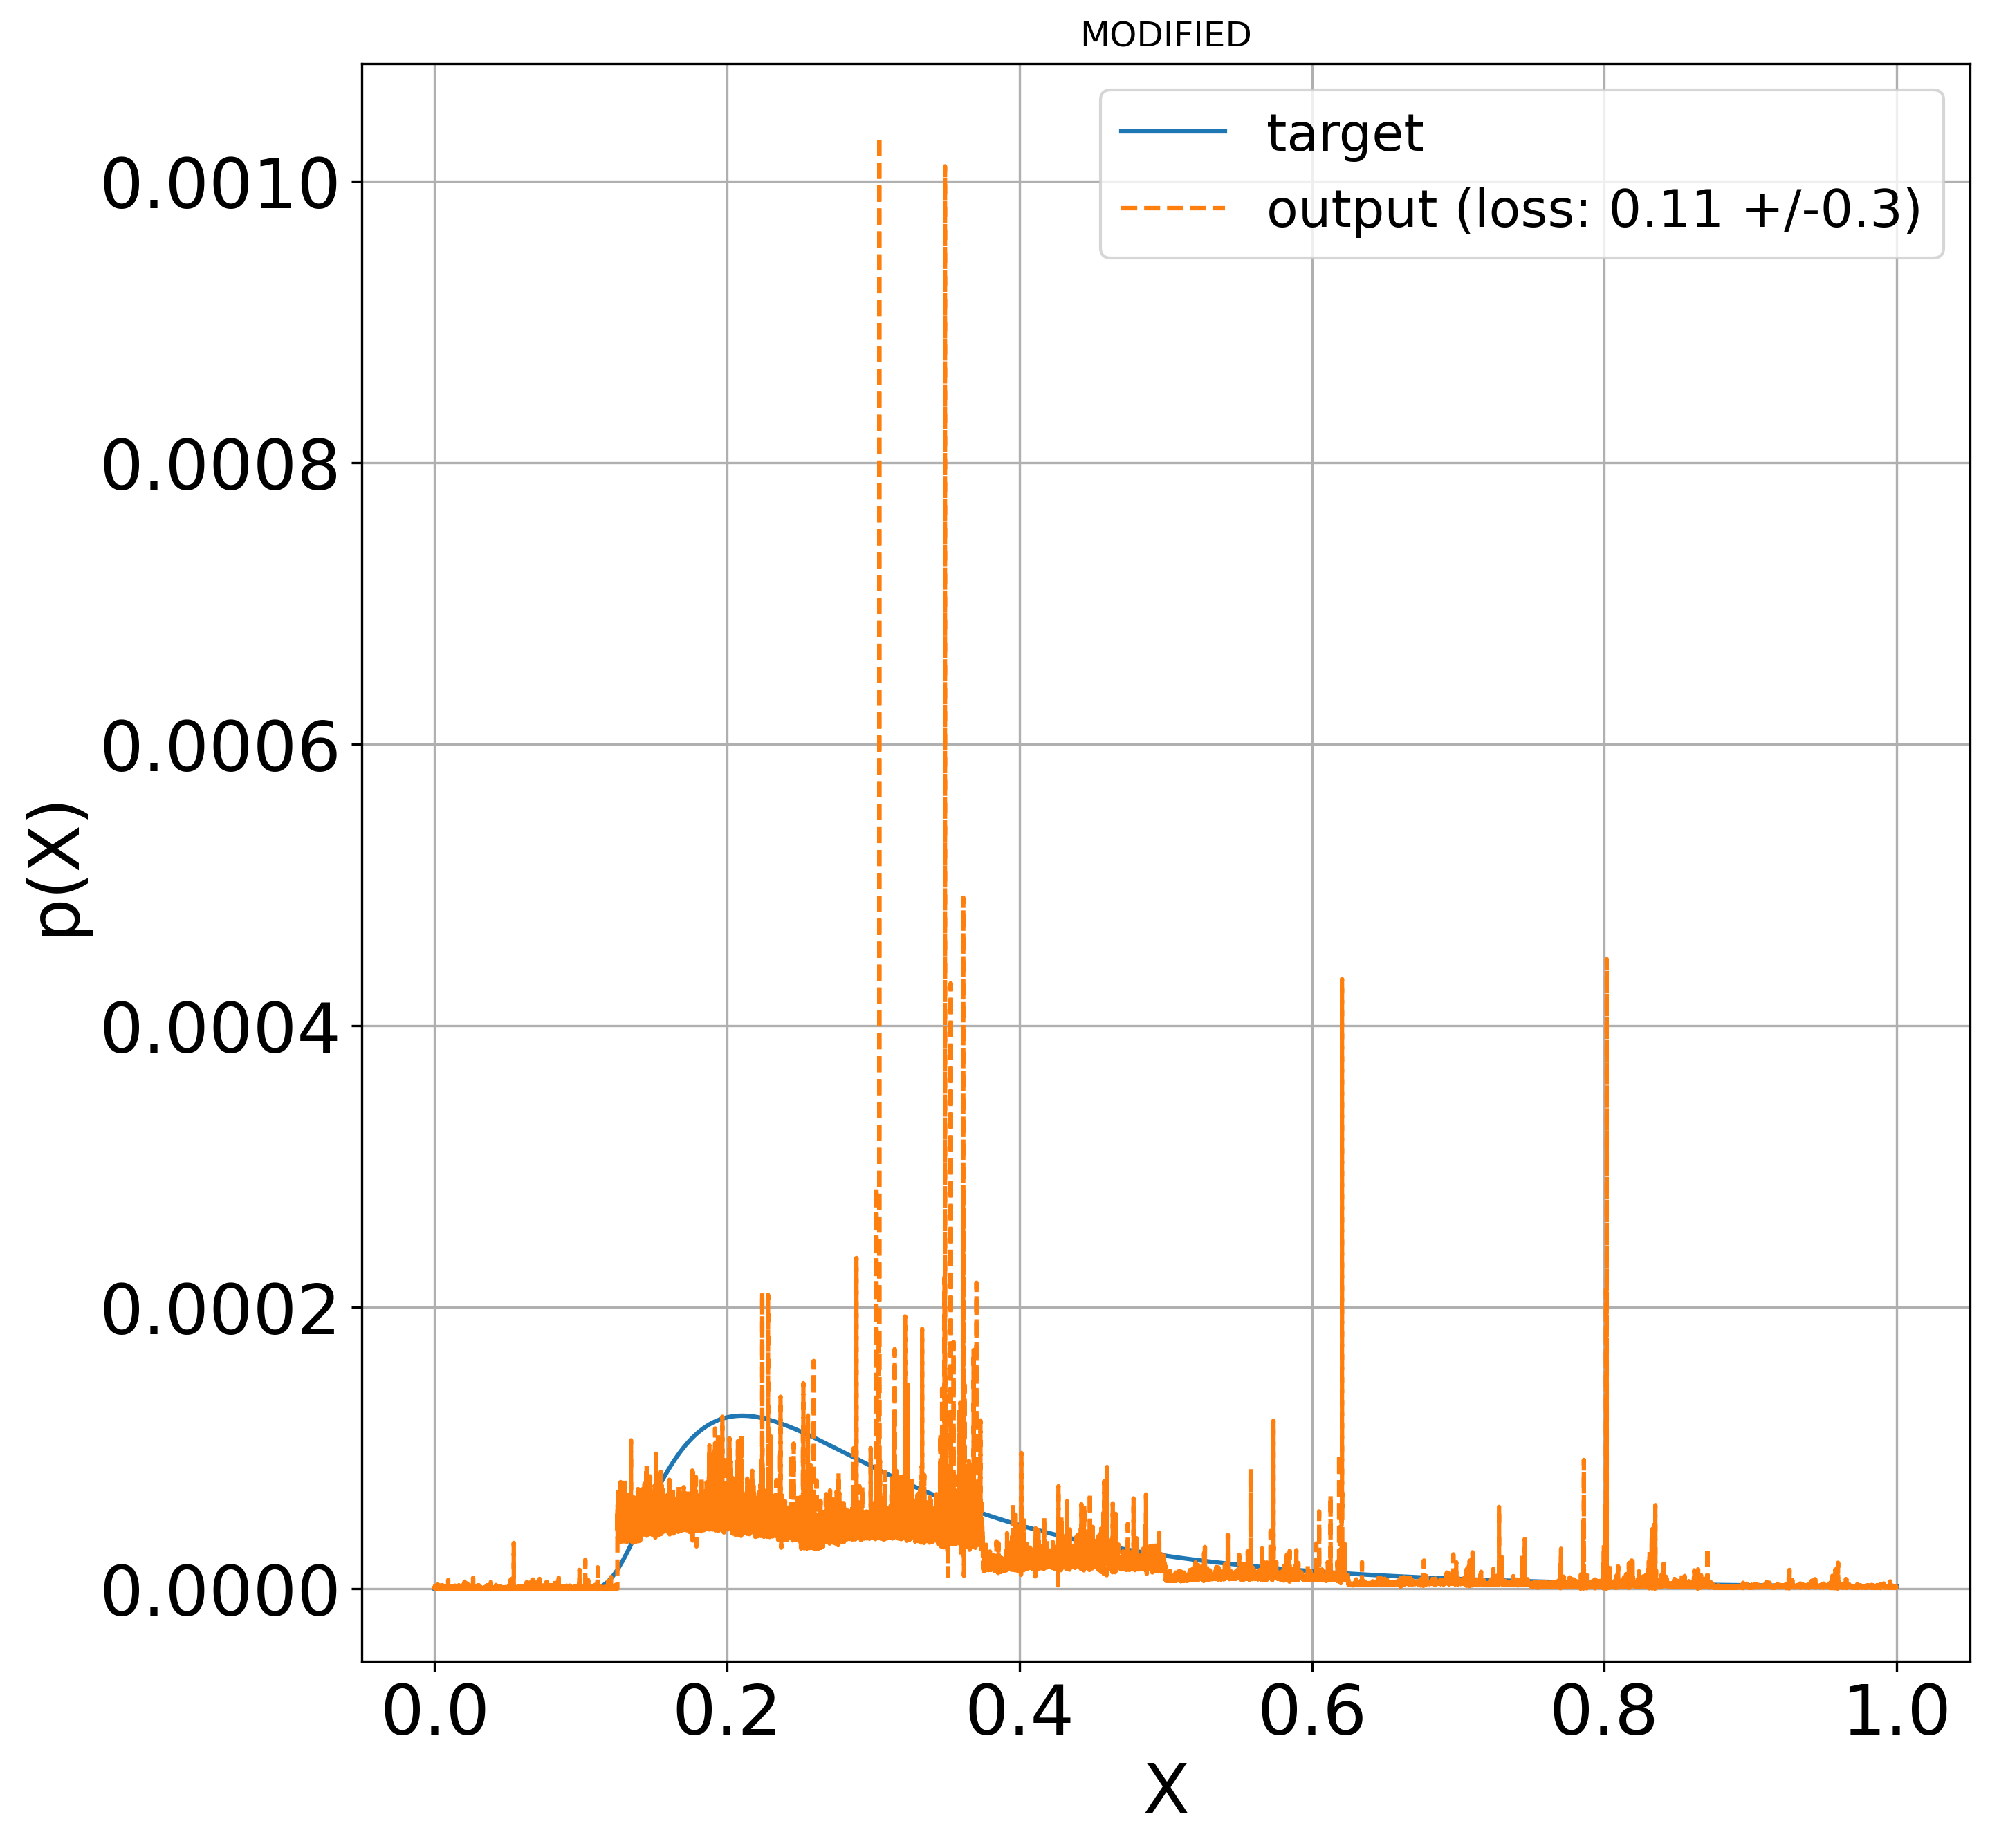

<Figure size 640x480 with 0 Axes>

In [70]:
#model_type = "modified"

dist_type = "lognormal"
dist_params = {"x_points": (0, 1), "s": 1, "loc": 0.1, "scale": 0.3}
num_qubits = 15

target_state = get_state(num_qubits, dist_type, dist_params)

approx_file = os.path.join(SCRIPT_RESULTS_PATHS, dist_type, f"{model_type}_plot_{dist_type}_{num_qubits}qb_0.05eps.csv")
approx_states = np.loadtxt(approx_file, delimiter=",", dtype=np.complex64).astype(np.float32)

mean_approx= np.mean(approx_states, axis=0)

x_points = np.linspace(0, 1, 2**num_qubits)

fontsize=24
plt.figure(figsize=(10, 10), dpi=300)
plt.title(model_type.upper())
plt.plot(x_points, np.abs(target_state)**2, label="target")
plt.plot(x_points, np.abs(mean_approx)**2, "--", label=f"output (loss: {round(mean_losses, 2)} +/-{round(std_losses, 2)})")
plt.grid()
plt.xlabel("X", fontsize=fontsize)
plt.ylabel("p(X)", fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(loc="best", fontsize=18)
plot_file_path = os.path.join(SCRIPT_RESULTS_PATHS, dist_type, f"{model_type}_density_plot_{dist_type}_{num_qubits}qb_0.5eps.pdf")
plt.savefig(plot_file_path)
plt.show()
plt.close()
plt.clf()

#### Laplace $(\mu = 0.5 , \sigma = 0.2)$

/tmp/ipykernel_5304/418068913.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  approx_states = np.loadtxt(approx_file, delimiter=",", dtype=np.complex64).astype(np.float32)


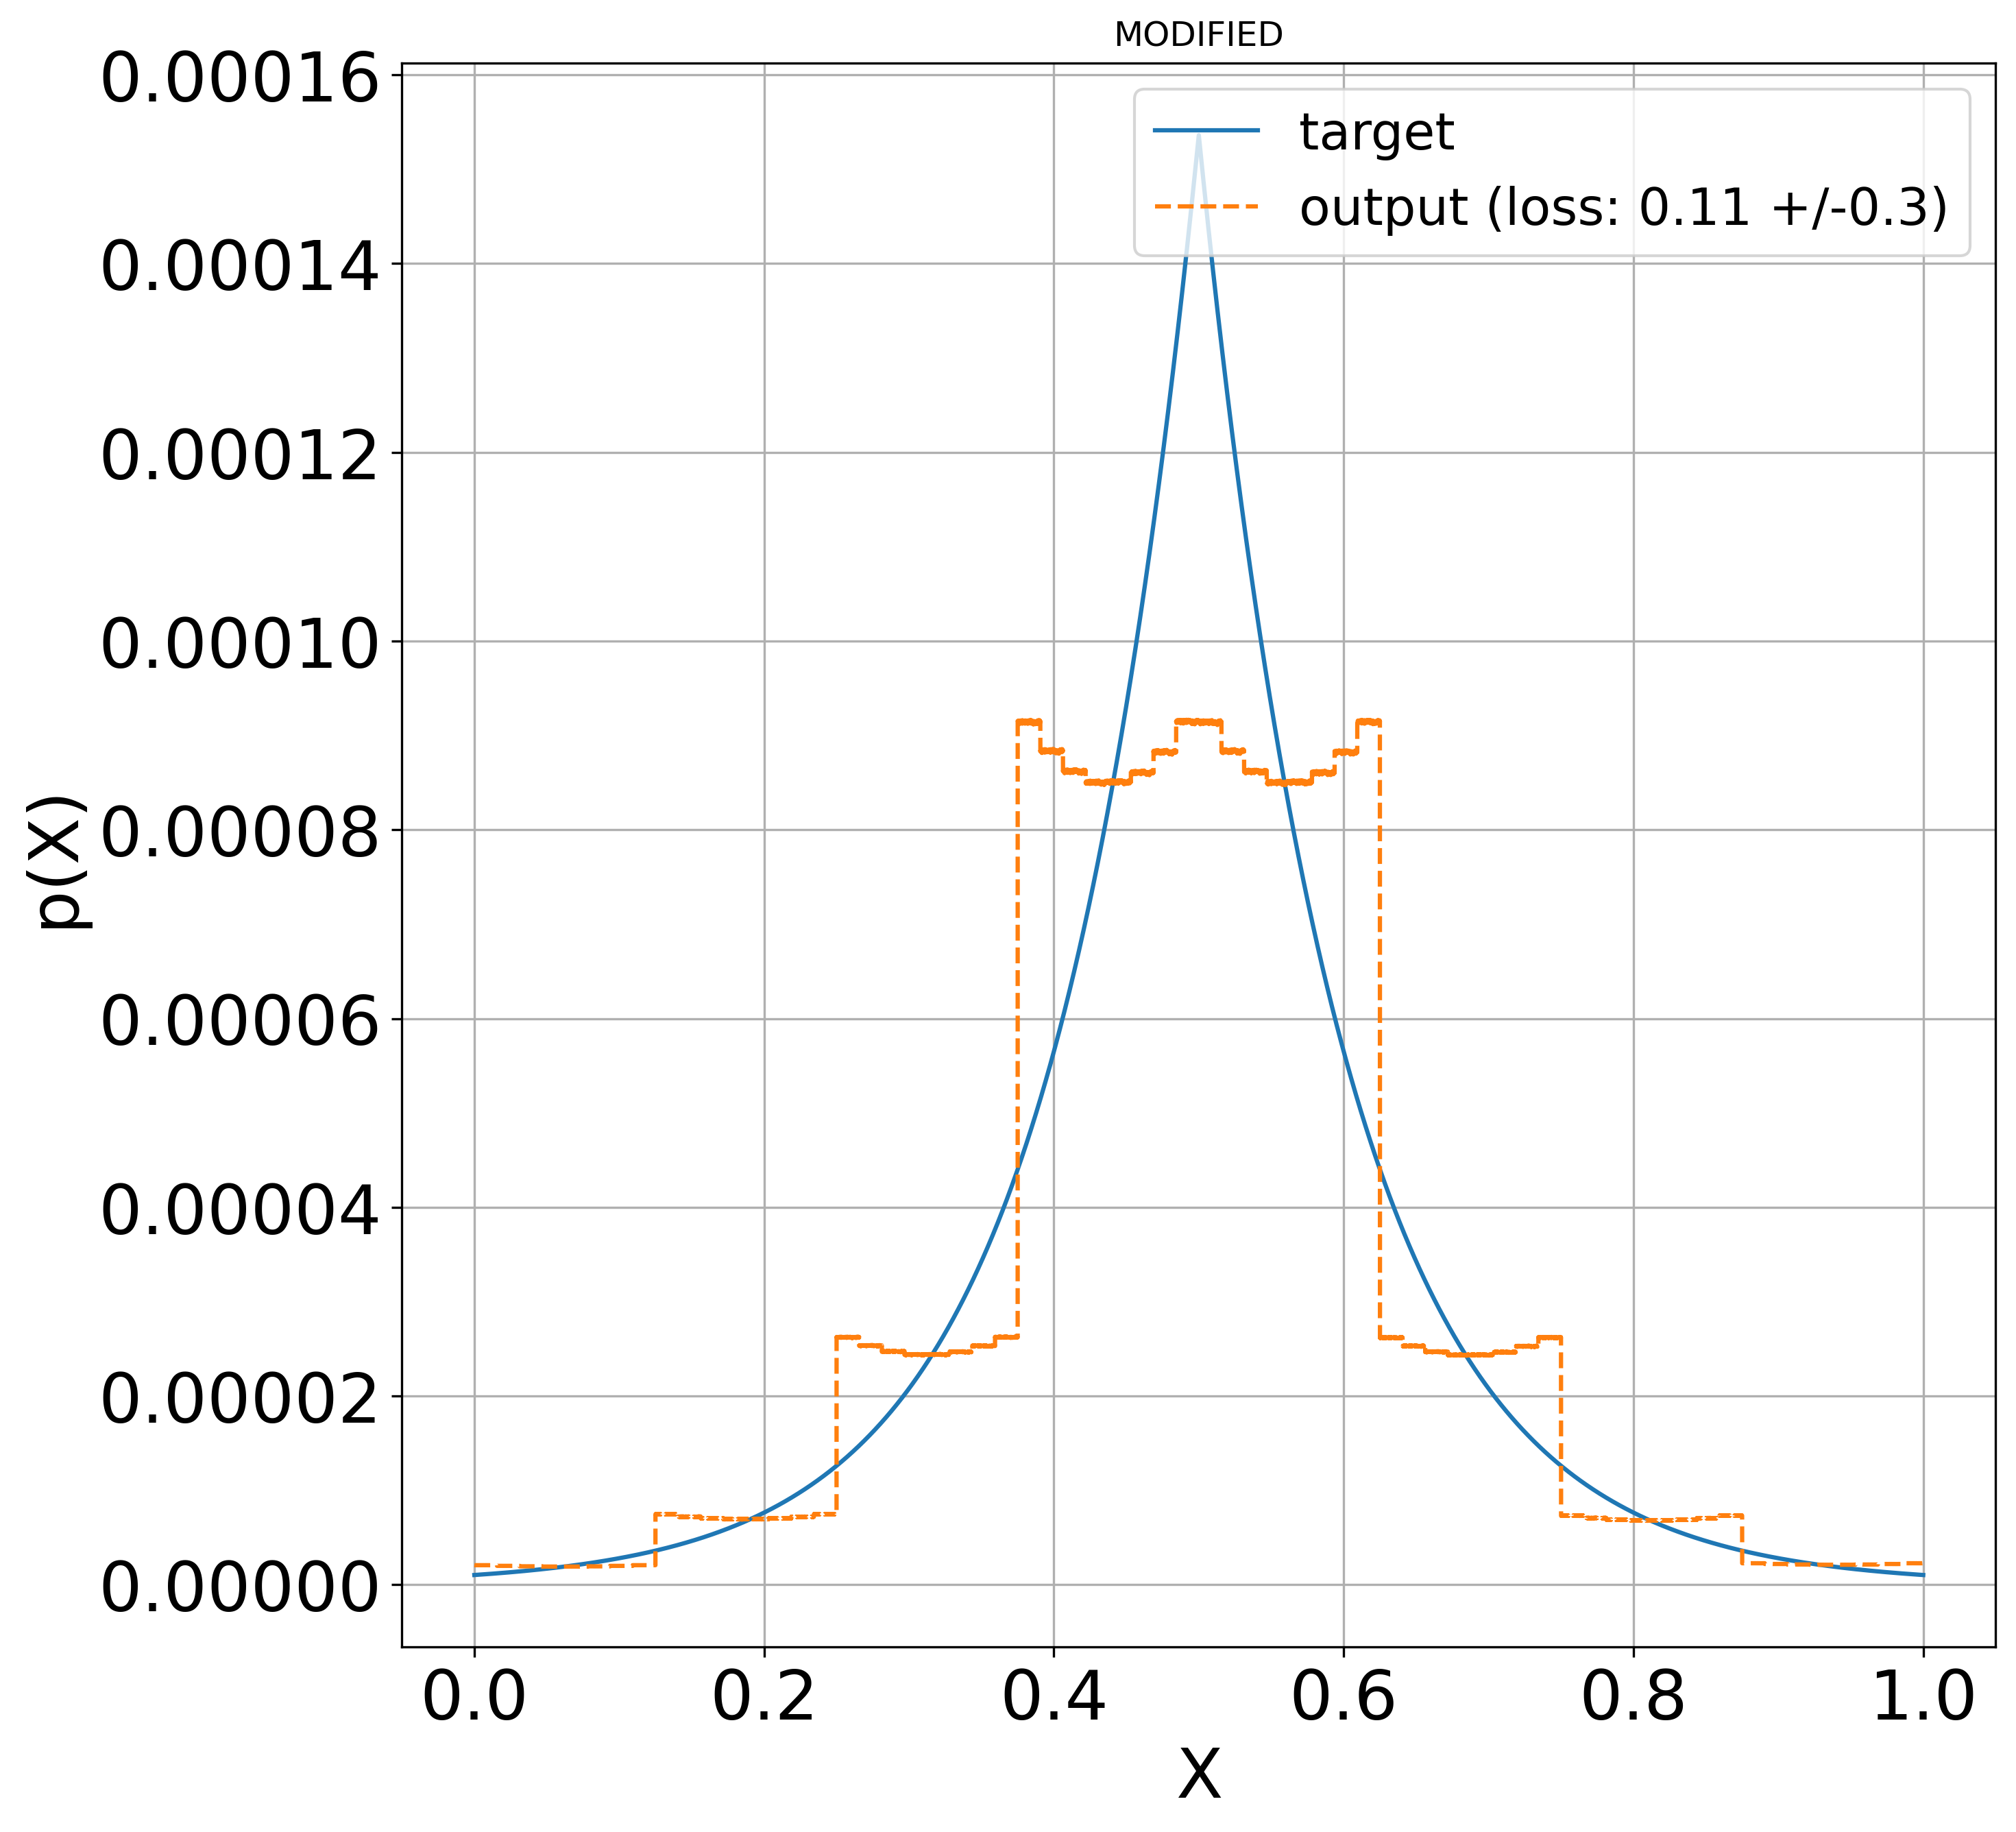

<Figure size 640x480 with 0 Axes>

In [71]:
#model_type = "original"

dist_type = "laplace"
dist_params = {"x_points": (0, 1), "loc": 0.5, "scale": 0.2}
num_qubits = 15

target_state = get_state(num_qubits, dist_type, dist_params)

approx_file = os.path.join(SCRIPT_RESULTS_PATHS, dist_type, f"{model_type}_plot_{dist_type}_{num_qubits}qb_0.05eps.csv")
approx_states = np.loadtxt(approx_file, delimiter=",", dtype=np.complex64).astype(np.float32)

mean_approx= np.mean(approx_states, axis=0)

x_points = np.linspace(0, 1, 2**num_qubits)

fontsize = 24
plt.figure(figsize=(10, 10), dpi=300)
plt.title(model_type.upper())
plt.plot(x_points, np.abs(target_state)**2, label="target")
plt.plot(x_points, np.abs(mean_approx)**2, "--", label=f"output (loss: {round(mean_losses, 2)} +/-{round(std_losses, 2)})")
plt.grid()
plt.xlabel("X", fontsize=fontsize)
plt.ylabel("p(X)", fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(loc="best", fontsize=18)
plot_file_path = os.path.join(SCRIPT_RESULTS_PATHS, dist_type, f"{model_type}_density_plot_{dist_type}_{num_qubits}qb_0.5eps.pdf")
plt.savefig(plot_file_path)
plt.show()
plt.close()
plt.clf()

#### Bimodal $(\mu_2 = 0.25, \sigma_2 = 0.1 ;\mu_2 = 0.75, \sigma_2 = 0.15)$

/tmp/ipykernel_5304/3566536278.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  approx_states = np.loadtxt(approx_file, delimiter=",", dtype=np.complex64).astype(np.float32)


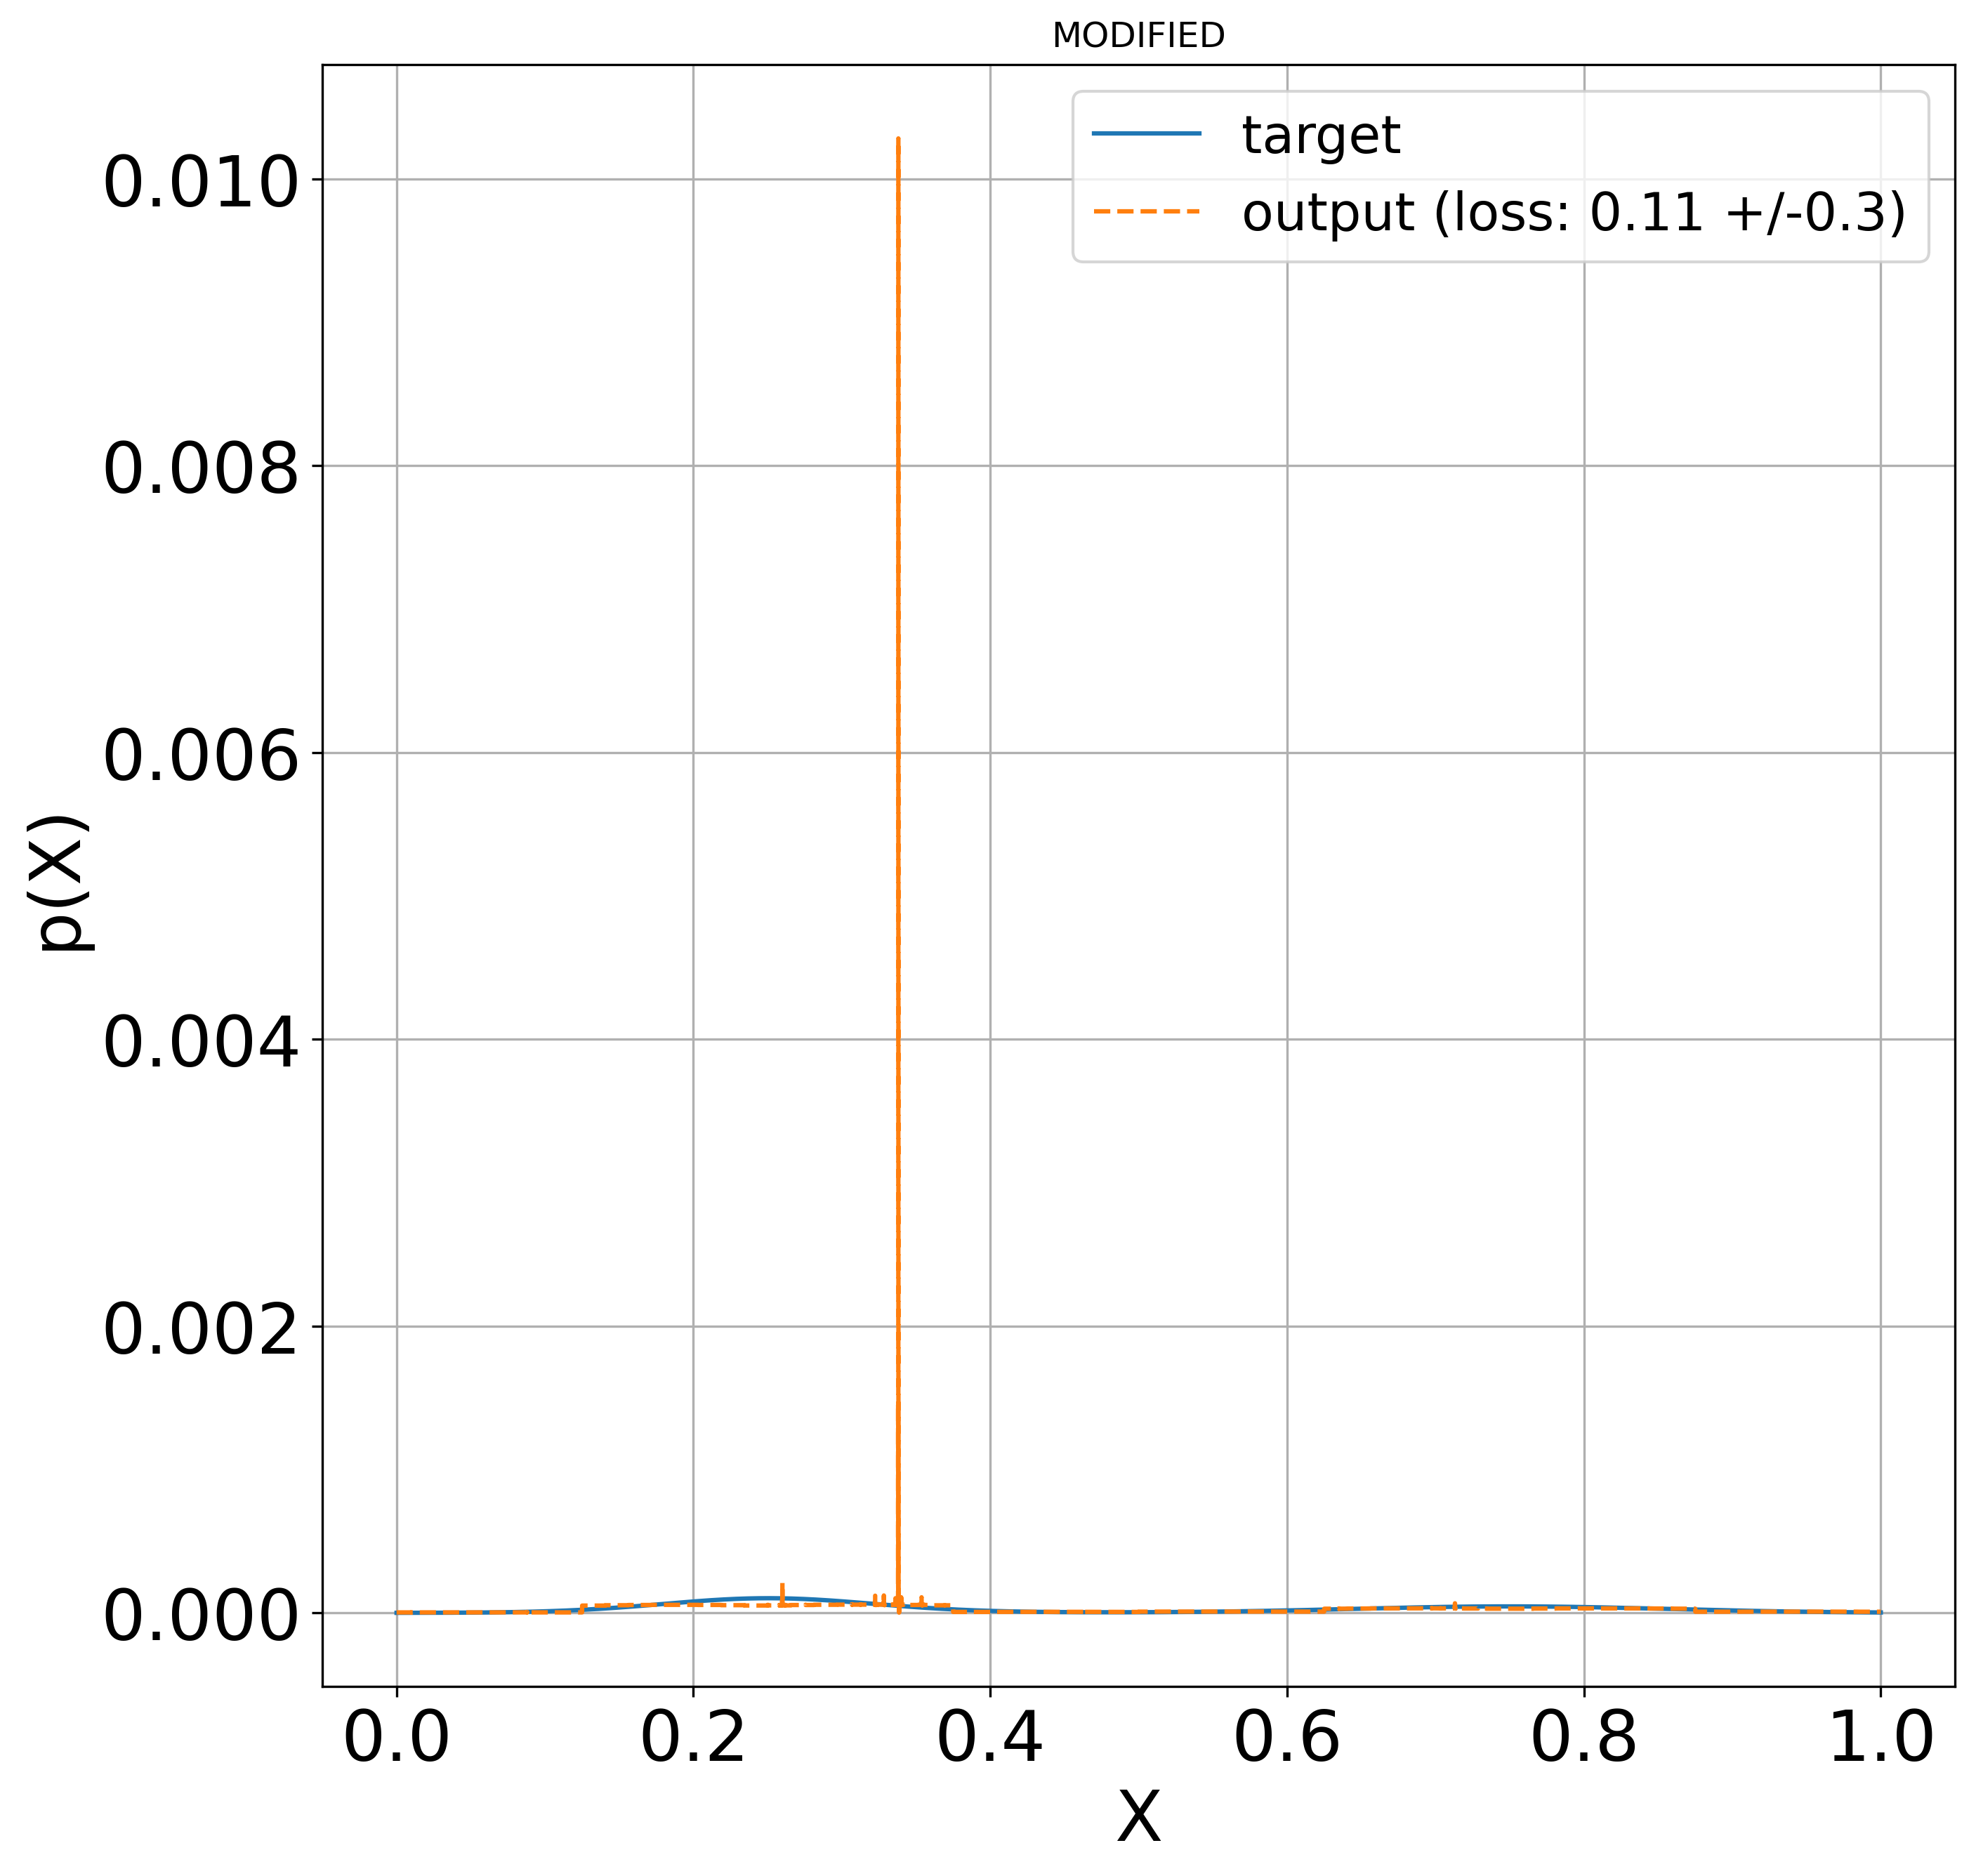

<Figure size 640x480 with 0 Axes>

In [72]:
#model_type = "original"

dist_type = "bimodal"
dist_params = { "x_points": (0, 1), "loc_bim1": 0.25, "scale_bim1": 0.1, "loc_bim2": 0.75, "scale_bim2": 0.15 }
num_qubits = 15

target_state = get_state(num_qubits, dist_type, dist_params)

approx_file = os.path.join(SCRIPT_RESULTS_PATHS, dist_type, f"{model_type}_plot_{dist_type}_{num_qubits}qb_0.05eps.csv")
approx_states = np.loadtxt(approx_file, delimiter=",", dtype=np.complex64).astype(np.float32)

mean_approx= np.mean(approx_states, axis=0)

x_points = np.linspace(0, 1, 2**num_qubits)

fontsize = 24
plt.figure(figsize=(10, 10), dpi=300)
plt.title(model_type.upper())
plt.plot(x_points, np.abs(target_state)**2, label="target")
plt.plot(x_points, np.abs(mean_approx)**2, "--", label=f"output (loss: {round(mean_losses, 2)} +/-{round(std_losses, 2)})")
plt.grid()
plt.xlabel("X", fontsize=fontsize)
plt.ylabel("p(X)", fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.legend(loc="best", fontsize=18)
plot_file_path = os.path.join(SCRIPT_RESULTS_PATHS, dist_type, f"{model_type}_density_plot_{dist_type}_{num_qubits}qb_0.5eps.pdf")
plt.savefig(plot_file_path)
plt.show()
plt.close()
plt.clf()